# Decision Tree Classification

## Importing the libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [38]:
dataset = pd.read_csv('classification_df.csv')
dataset.head()

,userid,rank-type,contest1,contest2,contest3,contest4,contest5,contest6,contest7,contest8,contest9,contest10
0,3143927301,Candidate Master,2078,2055,2115,2047.0,2024.0,2010.0,1953.0,1936.0,2042.0,2045.0
1,1876577621,Master,2194,2114,2152,2179.0,2211.0,2154.0,2170.0,2141.0,2157.0,2209.0
2,6397741793,Master,2120,2206,2147,2234.0,2294.0,2090.0,2089.0,2072.0,2085.0,2114.0
3,3090123616,Master,2224,2222,2166,2116.0,2029.0,2113.0,2104.0,2096.0,2115.0,2163.0
4,9564162806,Master,2128,2120,2072,2018.0,1963.0,2039.0,1932.0,1963.0,1960.0,1886.0


## Data Pre-processing

### Feature Selection

In [39]:
features = dataset.columns[2:]
classes = pd.Series(dataset.iloc[:, 1].values).unique()
print("the features are :")
print(features)
print("the classes are :")
print(classes)

the features are :
Index(['contest1', 'contest2', 'contest3', 'contest4', 'contest5', 'contest6',
       'contest7', 'contest8', 'contest9', 'contest10'],
      dtype='object')
the classes are :
['Candidate Master ' 'Master ' 'Grandmaster ' 'International Grandmaster '
 'International Master ' 'Legendary Grandmaster ' 'Pupil ' 'Newbie ']


In [40]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values
# print(pd.Series(y).unique())

### Filling missing values

In [41]:
for col in ['contest4', 'contest5', 'contest6']:
    dataset[col] = dataset.apply(
        lambda row: row[['contest1', 'contest2', 'contest3', 'contest4', 'contest5', 'contest6']].mean() 
                     if pd.isna(row[col]) else row[col], 
        axis=1
    )

# Step 2: Linear interpolation for contest7, contest8, contest9, contest10
# Here we can interpolate based on the entire row, not just from the previous contests
dataset[['contest7', 'contest8', 'contest9', 'contest10']] = dataset[['contest7', 'contest8', 'contest9', 'contest10']].interpolate(method='linear')

# Optional: Replace any remaining NaN values with 0 or another strategy if needed
dataset.fillna(0, inplace=True)  # This can be adjusted based on your specific needs


### Encoding categorical data

In [53]:
from sklearn.preprocessing import LabelEncoder

# Print unique class labels before encoding
print("Unique classes before encoding:", pd.Series(y).unique())

# Initialize LabelEncoder and fit-transform y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Print unique encoded values
print("Encoded classes:", pd.Series(y_encoded).unique())

# Create a dictionary mapping encoded values to class names
class_mappings = dict(zip(le.transform(le.classes_), le.classes_))
print("Class mappings:", class_mappings)

# Alternatively, print each mapping more clearly
for index, class_name in enumerate(le.classes_):
    print(f"{index}: {class_name}")

Unique classes before encoding: ['Candidate Master ' 'Master ' 'Grandmaster ' 'International Grandmaster '
 'International Master ' 'Legendary Grandmaster ' 'Pupil ' 'Newbie ']
Encoded classes: [0 5 1 2 3 4 7 6]
Class mappings: {0: 'Candidate Master ', 1: 'Grandmaster ', 2: 'International Grandmaster ', 3: 'International Master ', 4: 'Legendary Grandmaster ', 5: 'Master ', 6: 'Newbie ', 7: 'Pupil '}
0: Candidate Master 
1: Grandmaster 
2: International Grandmaster 
3: International Master 
4: Legendary Grandmaster 
5: Master 
6: Newbie 
7: Pupil 


### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, :] = sc.fit_transform(X[:, :])
X[0]

array([-0.64579374, -0.51530315, -0.10659784, -0.15214955, -0.0897824 ,
       -0.04882119, -0.19969825, -0.2551406 ,  0.06673576,  0.10472997])

## Splitting the data into training and test set

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [45]:
print(X_train)

[[-0.378845   -0.29733643 -0.58631727 ... -2.33312329 -3.33811127
   0.30592993]
 [-0.60640786 -0.61217725 -0.22562597 ... -0.40163025 -0.27856712
  -0.52093698]
 [ 2.19874208  2.09222468  1.92048727 ...  0.49900977  0.37724068
   0.1618448 ]
 ...
 [ 0.98215599  0.72791445  1.24599454 ...  1.19890472  0.85370512
   1.04712459]
 [ 0.30821981  0.49783847  0.47772207 ... -0.21987458  0.07476606
  -0.03546096]
 [-0.672051   -1.32662373 -2.10843455 ... -1.55455798 -1.42154643
  -1.45554321]]


In [46]:
print(y_train)

['Master ' 'Candidate Master ' 'International Grandmaster '
 'Candidate Master ' 'Candidate Master ' 'Master ' 'International Master '
 'Master ' 'Master ' 'Candidate Master ' 'Master ' 'International Master '
 'Master ' 'International Master ' 'Candidate Master ' 'Candidate Master '
 'Grandmaster ' 'Master ' 'Master ' 'Master ' 'Master ' 'Master '
 'Candidate Master ' 'Grandmaster ' 'International Grandmaster ' 'Master '
 'International Grandmaster ' 'International Master ' 'Candidate Master '
 'Candidate Master ' 'Candidate Master ' 'Master ' 'Master '
 'International Master ' 'Master ' 'Master ' 'Grandmaster ' 'Master '
 'Master ' 'Candidate Master ' 'Master ' 'Candidate Master '
 'International Master ' 'Master ' 'Candidate Master ' 'Candidate Master '
 'Master ' 'Master ' 'Grandmaster ' 'International Master ' 'Grandmaster '
 'Grandmaster ' 'Master ' 'Master ' 'Candidate Master ' 'Master '
 'Candidate Master ' 'Master ' 'Grandmaster ' 'Grandmaster ' 'Master '
 'Candidate Master ' 

## Implementing Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Instantiate the DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the model with the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Predicting the results

In [48]:
# y_pred = classifier.prpedict(X_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Master ' 'Master ']
 ['Master ' 'Master ']
 ['Master ' 'Master ']
 ...
 ['Candidate Master ' 'Candidate Master ']
 ['Master ' 'Master ']
 ['Candidate Master ' 'Candidate Master ']]


## Visualizing the results

### Visualizing the Tree

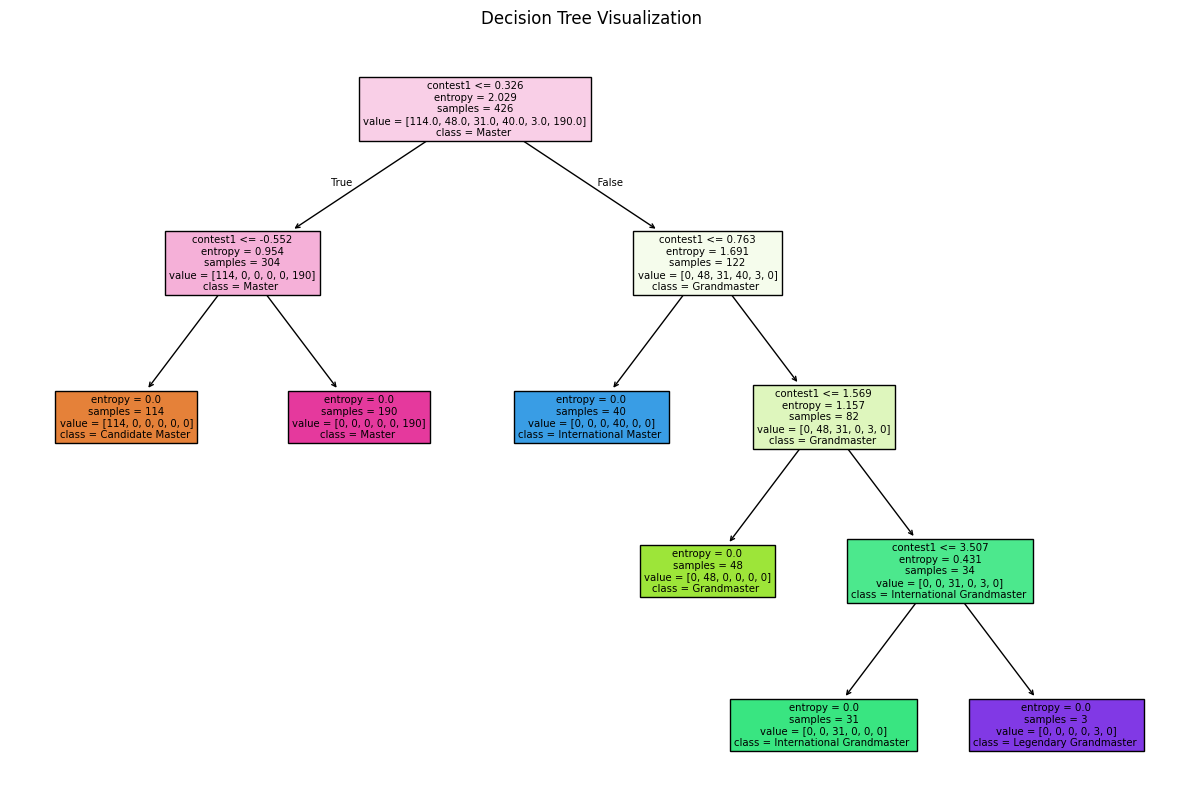

In [49]:
# Plotting the decision tree
plt.figure(figsize=(15, 10))
plot_tree(classifier, filled=True, feature_names=features, class_names=le.classes_.astype(str))  # Ensure class names are strings
plt.title('Decision Tree Visualization')
plt.show()

### Visualizing the learning curve

C:\Users\actio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


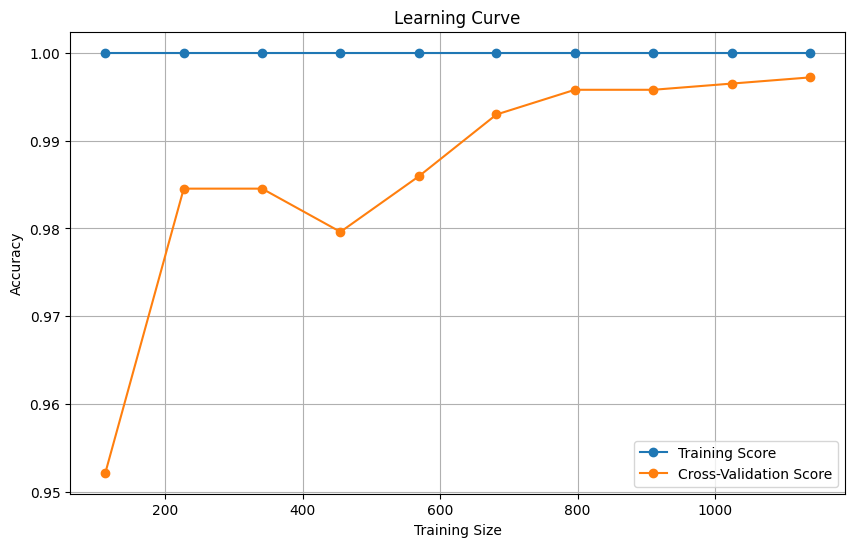

In [50]:
from sklearn.model_selection import learning_curve

# Generate learning curve data      
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


### Visualizing the confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[297   0   0   0   0   0   0   0]
 [  0 102   8   1   0   0   0   0]
 [  0   0  56   0   0   0   0   0]
 [  0   0   0  80   0   0   0   0]
 [  0   0   3   0   9   0   0   0]
 [  0   0   0   0   0 438   0   0]
 [  1   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0]]


0.9849548645937813

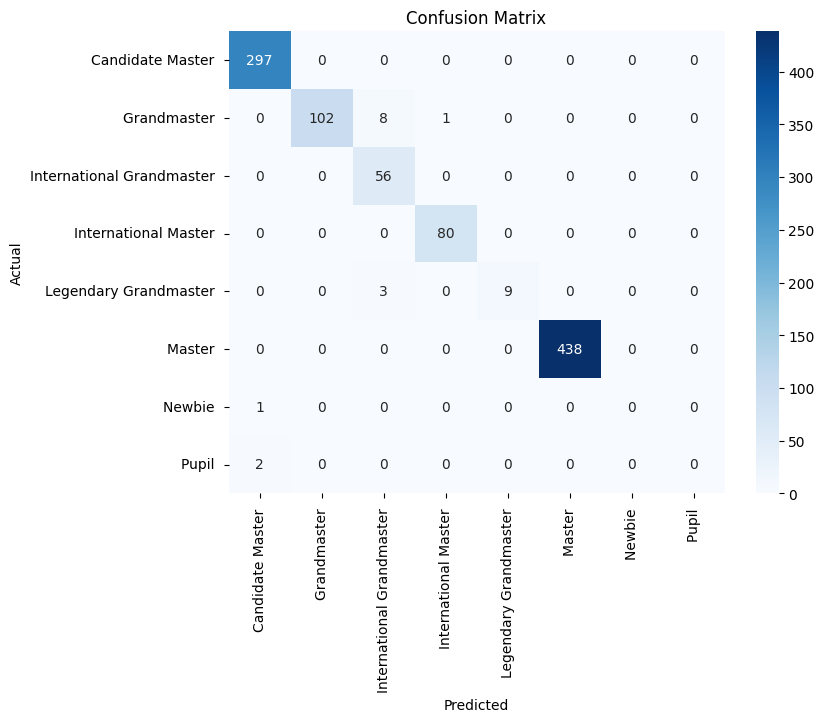

Accuracy Score: 0.9849548645937813


In [52]:
import seaborn as sns

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)